In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hosp = pd.read_csv("hosp.csv", dtype={'Quantidade': int})
hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607020 entries, 0 to 1607019
Data columns (total 20 columns):
COD_MUNICIPIO        1607020 non-null int64
NO_MUNICIPIO         1607020 non-null object
COD_MUNICIPIO_RES    1607020 non-null int64
NO_MUNICIPIO_RES     1607020 non-null object
CNES                 1607020 non-null int64
ESTABELECIMENTO      1607020 non-null object
COD_PROCEDIMENTO     1607020 non-null int64
NO_PROCEDIMENTO      1607020 non-null object
SEXO                 1607020 non-null object
COD_RACA             1607020 non-null int64
RACACOR              1607020 non-null object
IDADE                1607020 non-null int64
Quantidade           1607020 non-null int64
Valor                1607020 non-null float64
ANO_MES              1607020 non-null object
ano                  1607020 non-null int64
mes                  1607020 non-null int64
latitude             1607020 non-null float64
longitude            1607020 non-null float64
name                 1607020 non-null 

### Procedimentos que mais ocorreram e suas datas e cidades

In [3]:
mais_oc = hosp.sort_values('Quantidade', ascending=False)[:10]
mo = mais_oc[['NO_PROCEDIMENTO','Quantidade', 'ano', 'mes', 'NO_MUNICIPIO']]
mo

,NO_PROCEDIMENTO,Quantidade,ano,mes,NO_MUNICIPIO
223629,ATENDIMENTO FAMILIAR EM CENTRO DE ATENÇÃO PSIC...,2018,2017,6,CAMPINA GRANDE
18390,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,1608,2017,8,ALHANDRA
18302,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,1394,2017,12,ALHANDRA
16146,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,1388,2017,7,ALHANDRA
238550,TERAPIA INDIVIDUAL,1135,2018,11,CATOLE DO ROCHA
1053455,CONSULTA MEDICA EM ATENÇÃO ESPECIALIZADA,1111,2017,10,JOAO PESSOA
960781,ADMINISTRACAO DE MEDICAMENTOS NA ATENCAO ESPEC...,1109,2019,1,JOAO PESSOA
76050,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,980,2018,3,BAYEUX
16357,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,929,2017,11,ALHANDRA
903953,ADMINISTRACAO DE MEDICAMENTOS NA ATENCAO ESPEC...,855,2019,5,JOAO PESSOA


Text(0.5, 0.97, 'Procedimentos que mais ocorreram entre 2017 e 2019 na Paraíba')

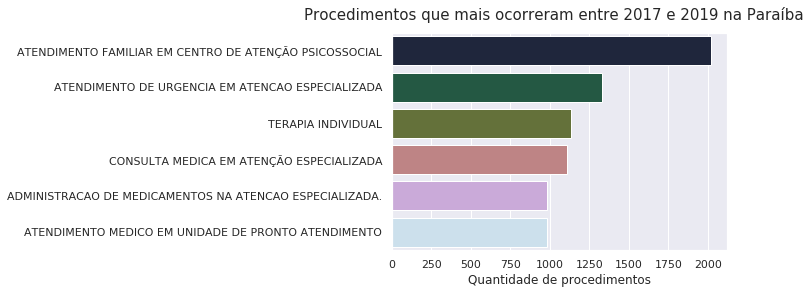

In [4]:
sns.set()
sns.set_palette("cubehelix")
ax = sns.barplot(y="NO_PROCEDIMENTO", x="Quantidade", data=mais_oc, ci=None)
figure = ax.get_figure() 
ax.set_ylabel('')    
ax.set_xlabel('Quantidade de procedimentos')
figure.suptitle('Procedimentos que mais ocorreram entre 2017 e 2019 na Paraíba', y=0.97, fontsize=15)

### Quantidade de procedimentos realizados por ano

Text(0.5, 0.97, 'Quantidade de procedimentos realizados entre 2017 e 2019 na Paraíba')

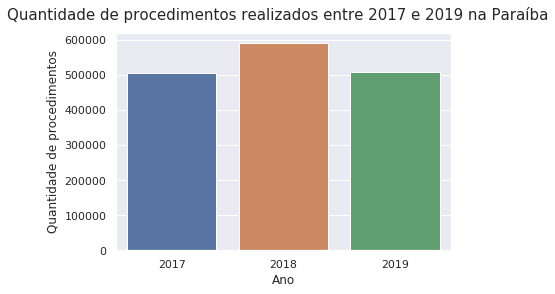

In [5]:
anos = hosp.ano.value_counts()
a = anos.to_frame().reset_index().rename(columns={'index':'ano', 'ano':'qtd_proced'})
sns.set()
ax = sns.barplot(y="qtd_proced", x="ano", data=a, ci=None)
figure = ax.get_figure() 
ax.set_ylabel('Quantidade de procedimentos')    
ax.set_xlabel('Ano')
figure.suptitle('Quantidade de procedimentos realizados entre 2017 e 2019 na Paraíba', y=0.97, fontsize=15)

### Quantidade de pacientes por idade e os procedimentos que eles realizaram

In [6]:
hosp.IDADE.value_counts(ascending=False)[:10]

39    25159
38    25079
40    25000
37    24582
42    24569
41    24367
44    24355
43    24337
49    24303
45    24055
Name: IDADE, dtype: int64

In [7]:
idade_maioria = hosp.loc[(hosp['IDADE'] >= 37) & (hosp['IDADE'] <=49)]
idades = idade_maioria.IDADE.value_counts()[:10]
i = idades.to_frame().reset_index().rename(columns = {'index': 'idade', 'IDADE': 'qtd_idades'})
i

,idade,qtd_idades
0,39,25159
1,38,25079
2,40,25000
3,37,24582
4,42,24569
5,41,24367
6,44,24355
7,43,24337
8,49,24303
9,45,24055


Text(0.5, 0.97, 'Procedimentos que os pacientes de 37 a 49 anos fizeram entre 2017 e 2019 na Paraíba')

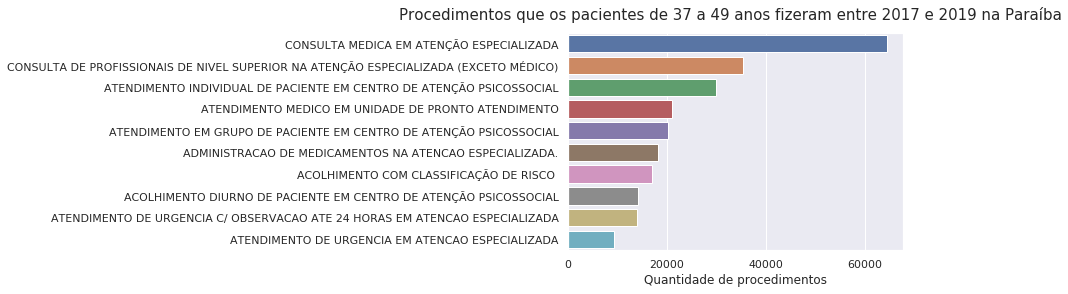

In [8]:
proc_idade = idade_maioria.NO_PROCEDIMENTO.value_counts()[:10]
pi = proc_idade.to_frame().reset_index().rename(columns = {'index': 'procedimento', 'NO_PROCEDIMENTO': 'qtd_procedimentos'})
sns.set()
ax = sns.barplot(y="procedimento", x="qtd_procedimentos", data=pi, ci=None)
figure = ax.get_figure() 
sns.set_context("talk")
ax.set_ylabel('')    
ax.set_xlabel('Quantidade de procedimentos')
figure.suptitle('Procedimentos que os pacientes de 37 a 49 anos fizeram entre 2017 e 2019 na Paraíba', y=0.97, fontsize=15)

### Estabelecimentos (hospitais, postos de saúde etc) que mais fazem atendimentos e seus municípios

In [9]:
mais_atend = hosp.ESTABELECIMENTO.value_counts(ascending=False)[:10]
mais_atend

FUNAD                                                       128496
COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMENTINO FRAGA     90731
UPA CRUZ DAS ARMAS                                           71607
UPA 24H UNIDADE DE PRONTO ATENDIMENTO BAYEUX                 68154
CAIS JAGUARIBE                                               62251
HOSPITAL GERAL DE MAMANGUAPE                                 55142
UNIDADE DE PRONTO ATENDIMENTO CELIO PIRES DE SA              55119
HOSPITAL SAO VICENTE DE PAULO                                51881
MATERNIDADE CANDIDA VARGAS                                   48905
UPA UNIDADE DE PRONTO ATENDIMENTO DE POMBAL                  44584
Name: ESTABELECIMENTO, dtype: int64

In [10]:
hosp['qtd_atendimentos'] = hosp.groupby(['ESTABELECIMENTO'])['NO_PROCEDIMENTO'].transform('count')
mais_atend = hosp.sort_values(by='qtd_atendimentos', ascending=False)
ma_at = mais_atend[['ESTABELECIMENTO','qtd_atendimentos','NO_MUNICIPIO']]
ma = ma_at.drop_duplicates()[:10]
ma

,ESTABELECIMENTO,qtd_atendimentos,NO_MUNICIPIO
1004962,FUNAD,128496,JOAO PESSOA
1158005,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,90731,JOAO PESSOA
934563,UPA CRUZ DAS ARMAS,71607,JOAO PESSOA
96734,UPA 24H UNIDADE DE PRONTO ATENDIMENTO BAYEUX,68154,BAYEUX
382360,CAIS JAGUARIBE,62251,JOAO PESSOA
1240820,HOSPITAL GERAL DE MAMANGUAPE,55142,MAMANGUAPE
906741,UNIDADE DE PRONTO ATENDIMENTO CELIO PIRES DE SA,55119,JOAO PESSOA
691951,HOSPITAL SAO VICENTE DE PAULO,51881,JOAO PESSOA
635902,MATERNIDADE CANDIDA VARGAS,48905,JOAO PESSOA
1381750,UPA UNIDADE DE PRONTO ATENDIMENTO DE POMBAL,44584,POMBAL


Text(0.5, 0.97, 'Estabelecimentos que mais realizaram atendimentos entre 2017 e 2019 na Paraíba')

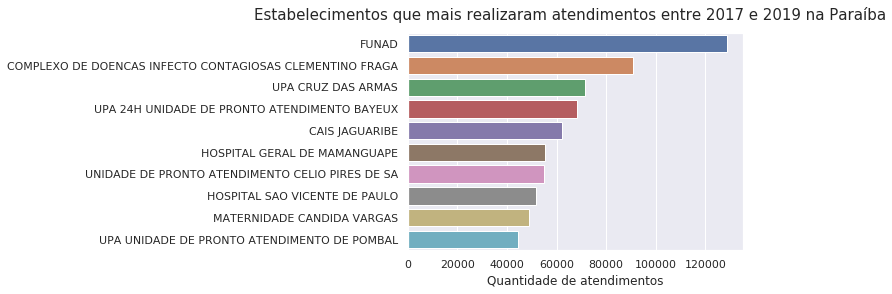

In [11]:
sns.set()
ax = sns.barplot(y="ESTABELECIMENTO", x="qtd_atendimentos", data=ma, ci=None)
figure = ax.get_figure() 
ax.set_ylabel('')    
ax.set_xlabel('Quantidade de atendimentos')
figure.suptitle('Estabelecimentos que mais realizaram atendimentos entre 2017 e 2019 na Paraíba', y=0.97, fontsize=15)

### Seria bom aquele mapa que o círculo fica maior a depender da quantidade de procedimentos no município